<a href="https://colab.research.google.com/github/davidmorasalazar/Forecasting-time-series-with-ARMA-and-othes-methods/blob/main/Tarea_3_Macroeconometr%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<center>
<img src="https://github.com/randall-romero/EC4301/blob/master/Laboratorios/Tema02-Ecuaciones/escuela-de-economia.png?raw=1" width="260" height="85">
</center>
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Estudiantes:  David Gerardo Mora Salazar, Manfred Ramírez Alfaro</b>
<br><br>
<b>Tarea 1:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Randall Romero Aguilar, PhD
</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Fecha límite de entrega: viernes 21 de mayo de 2021, 6pm</div> 
</center>


**Pregunta 2:**

(a) (4 puntos ) ¿Es este proceso estacionario?


  $(1-0.2L-0.24L^2)y_t=5.6+\epsilon_t$\
	\\
	Las raíces del polinomio de rezagos $1-0.2z-0.24z^2$ son iguales a $z_1=\frac{5}{3}$ y $z_2=\frac{-5}{2}$. El valor absoluto de estas raíces son mayores a 1, por tanto, esta ecuación es estacionaria.\
	\\
	

(b) (6 puntos ) Utilice las ecuaciones de Yule-Walker para calcular sus primeras 3 autocorrelaciones 	$\rho_1$, $\rho_2$, y $\rho_3$.


  $\rho_1=\frac{0.2}{1-0.24} = 0.2631$\
	\\
	$\rho_2= 0.2*0.2631+0.24=0.2926$\
	\\
	$\rho_3= 0.2*0.2926+0.24*0.2631=0.1217$\
	\

(c) (5 puntos ) Obtenga una simulación de T=240 períodos de este proceso, partiendo de valores iniciales
y0 = 11, y1 = 11.6. Para ello, escriba un programa en R, Python o Stata, y fije la “semilla”
de números aleatorios en 2020. Grafique sus resultados.

In [ ]:
/*En Stata*/
cls
/*=======================================================================
arma-simulations.do: Simulaciones de modelos ARMA

Basado en Becketti 2013 Introduction to Time Series Using Stata
file gdp-2.do

Universidad de Costa Rica
Escuela de Economía
Curso: EC4301 Macroeconometría
Estudiantes: David Gerardo Mora Salazar, Manfred Ramírez Alfaro
========================================================================*/

* Ajustes varios de STATA
graph drop _all
set autotabgraphs on

clear
set more off
capture log close
log using arma_simulations, replace

* Ajustes de parámetros para simulaciones
clear
set obs 240
generate int t = _n
tsset t
set seed 2020

*=========> Proceso de ruido blanco

generate epsilon = rnormal()
ac epsilon, name(acplot, replace) lags(20)
pac epsilon, name(pacplot, replace) lags(20)
graph combine acplot pacplot, name(WN)

*=========> Proceso AR(2), phi=0.2, 0.24

generate ar2 = epsilon
replace ar2 = 0.2*11.6+0.24*11 + epsilon in 3/l
ac ar2, name(acplot, replace) lags(20)
pac ar2, name(pacplot, replace) lags(20)
graph combine acplot pacplot, name(ar2)
*Gráfico
tsline ar2, recast(connected)

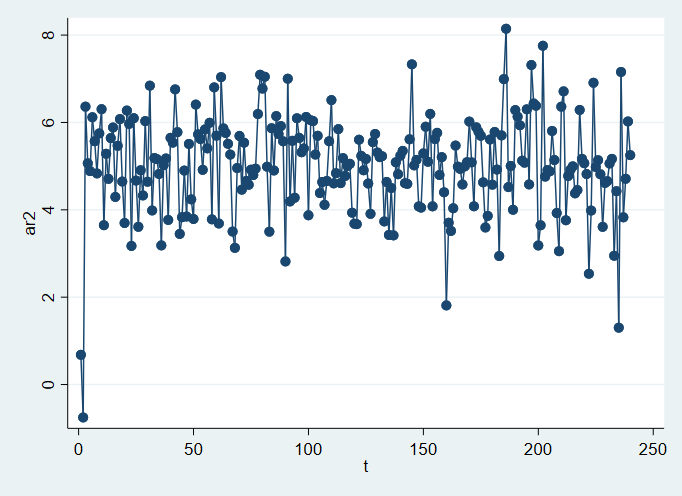

(d) (5 puntos ) Grafique el autocorrelograma y el autocorrelograma parcial de esta serie simulada.

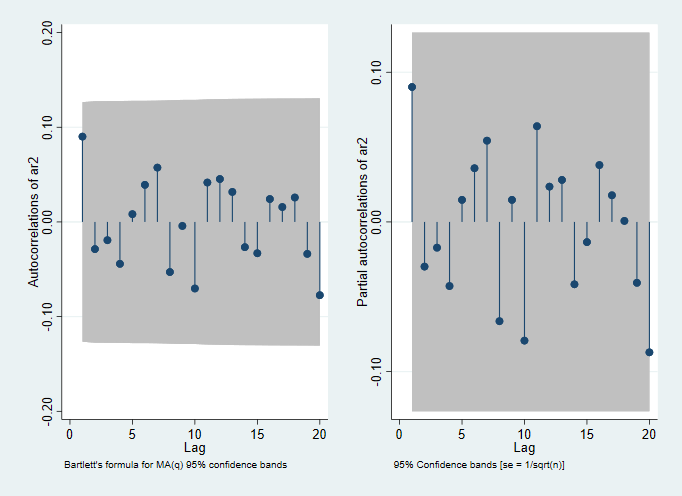

**Pregunta 5:**

Obtenga los datos disponibles del IMAE tendencia ciclo de Costa Rica, usando el servicio web del BCCR.

In [7]:
#Pregunta 5
from bccr import SW
from bccr import GUI
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import xlrd
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
from bccr import GUI
GUI()
IMAE = SW(IMAE=35553)
SW.quien(35553)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [21/May/2021 01:48:04] "GET /_alive_5b07b1b5-fc06-483a-a12a-ba5d0e421a06 HTTP/1.1" 200 -


Dash app running on:


<IPython.core.display.Javascript object>

Variable 35553 >>>
   Nombre      : IMAE Tendencia Ciclo.
   Descripcion : IMAE Tendencia Ciclo.
   Unidad      : Nivel.
   Periodicidad: Mensual.

|--- Sector Real
|------ IMAE Tendencia Ciclo [35553]'




(a) (4 puntos ) A partir del logaritmo de la serie, calcule la tasa de crecimiento interanual y la tasa
de crecimiento mensual anualizada (simplemente multiplicando por 12 la tasa mensual), y grafique
ambas tasas (solo datos desde enero de 2018) en un mismo gráfico.

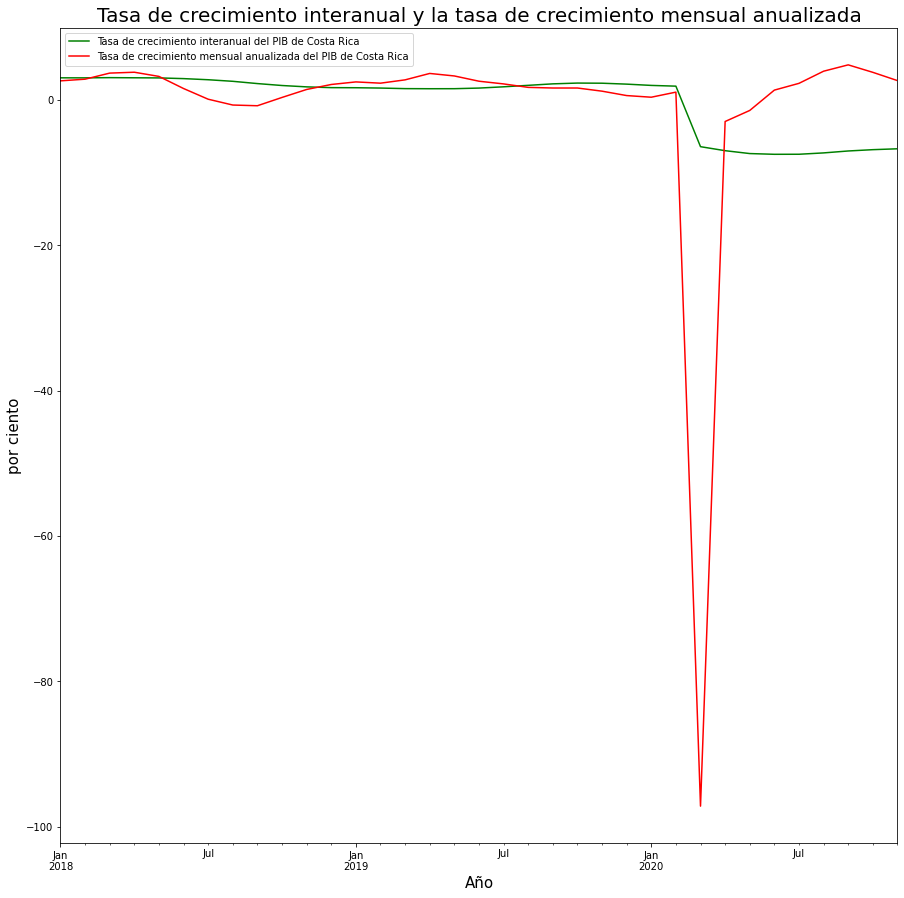

In [9]:
#a
tasa_int = (100*np.log(IMAE).diff(12)).rename(columns= {'IMAE':'Interanual'})
tasa_anual= (100*np.log(IMAE).diff()*12).rename(columns= {'IMAE':'Anualizada'})

tasa_int['Anualizada'] = tasa_anual
fecha = tasa_int['2018':'2020']

def figura1(dato1, dato2, leyenda1, leyenda2, titulo, y):
    variable_de_apoyo1 = dato1
    variable_de_apoyo2 = dato2
    IPCrespaldo = fecha.copy()
    IPCrespaldo['variable_de_apoyo1'] =variable_de_apoyo1
    IPCrespaldo['variable_de_apoyo2'] =variable_de_apoyo2
    IPCrespaldo['variable_de_apoyo1'].plot(color="green", label=leyenda1)
    IPCrespaldo['variable_de_apoyo2'].plot( color = "red", label=leyenda2)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.legend(fontsize=10)
    plt.title(titulo, fontsize=20)
    plt.xlabel(xlabel= "Año",fontsize=15)
    plt.ylabel(ylabel= y,fontsize=15)
    plt.show()        
    return
figura1(fecha['Interanual'], fecha['Anualizada'], "Tasa de crecimiento interanual del PIB de Costa Rica", 'Tasa de crecimiento mensual anualizada del PIB de Costa Rica',"Tasa de crecimiento interanual y la tasa de crecimiento mensual anualizada",'por ciento')   

(b) (4 puntos ) Explique por qué difieren tanto las dos series durante 2020.

 Diferen significativamente debido a que la primera tasa toma todos los valores mensuales hasta el año anterior para calcular la tasa de crecimiento, es decir,
es la suma de las tasas de crecimiento de cada mes, por tanto suaviza la variación que puede haber de un mes a otro. Mientras que la segunda tasa calcula la
tasa de crecimiento mensual y lo multiplica por 12, por tanto, le da más peso
a la variación de un mes a otro. Por eso, cualquier efecto esporádico, afecta en
mayor porcentaje a la tasa que pese más ese efecto.

(c) (8 puntos ) Asumiendo que la tasa de crecimiento mensual anualizada es estacionaria, estime un
modelo ARMA(p, q) utilizando datos únicamente hasta diciembre de 2019 (es decir, no incluya los
datos de 2020 en su estimación del ARMA). Considere únicamente especificaciones en las que p ≤ 4
y q ≤ 4. Justifique su elección de valores p y q.

In [ ]:
#c
#Creación del criterio de selección
#Akaike
anualizada_2019 =tasa_anual[:'2019'].dropna()
pmax = 4
qmax = 4
P = np.arange(pmax+1)
Q = np.arange(qmax+1)
aic = [[ARIMA(anualizada_2019, order=[p,0,q]).fit().aic for q in Q ] for p in P ]
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
AIC
# Recomienda p=4 y q=4
#Bayesiano
bic = [[ARIMA(anualizada_2019, order=[p,0,q]).fit().bic for q in Q ] for p in P ]
BIC = pd.DataFrame(bic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
BIC
#Recomienda p=1 y q=3
#En este caso, los criterios no coinciden, por lo que se recomienda el de Bayes.
#Estimación con p=1 y q=3
res = ARIMA(anualizada_2019, order=[1,0,3]).fit()
res.summary()

Akaike: 
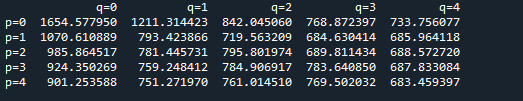

Bayesiano:
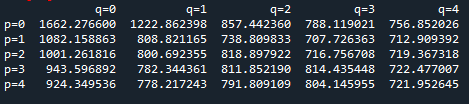

Estimación: 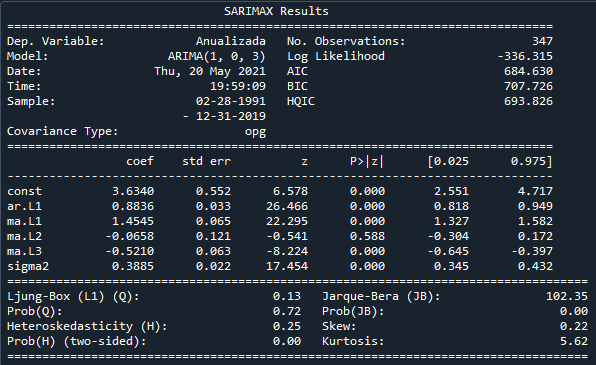

La elección de los valores p y q provienen de un proceso de selección que sugiere el uso de un modelo parsimoniosos, es decir, usar tan pocos parámetros como sea necesario, pues esta metodología tiene sus beneficios a la hora de hacer pronósticos. Entonces se realiza análisis de diagnóstico para confirmar que el modelo es consistente con los datos observados. Los criterios más usuales para analizar la concistencia son el de Akaike (Akaike) y el de Bayes (BIC) y por tanto, se escoge la combinación p y q que minimiza el criterio de información, sin embargo, al tener una disyuntiva entre la cantidad de rezagos con el ajuste del modelo y la precisión, se tuvo
que elegir una combinación de p y q que minimiza ese criterio de información. De esta manera, calculando ambos criterios, ambos difieren en su selección apropiada, pero debido a las propiedades del criterio de información Bayesiano, pues el Bayesiano es más riguroso en la penalización de los parámetros de manera que no se pierda precisión, por eso se escogió la combinación p=1 y q=3 que escogió el Bayesiano.



(d) (8 puntos ) Utilice su modelo estimado para pronosticar la serie en 2020. Grafique sus pronósticos
con intervalos de confianza del 90%.

In [ ]:
#d
horizon = 12 
ff= res.forecast(steps=horizon, alpha=0.1)#alpha de significancia
std = res.forecast(steps=horizon, alpha=0.1)#alpha de significancia
conf = res.forecast(steps=horizon, alpha=0.1)#alpha de significancia
alpha = np.arange(1,6)/10
zvalues = norm(0, 1).isf(np.array(alpha)/2)
# Datos pronosticados
fcast = pd.DataFrame({'Anualizada pronosticada':ff,'std':std}, index=pd.period_range(anualizada_2019.index[-1]+1, periods=horizon, freq='M'))

# Concatenar los datos observados con los pronosticados
fcast2 = pd.concat([anualizada_2019,fcast], sort=False)
fcast2['$\mu$'] = anualizada_2019.values.mean()

# Graficar la serie y el pronóstico
fig, ax =plt.subplots(figsize=[12,4]) 
fcast2.loc['2007-01':'2020-12'][["Anualizada",'Anualizada pronosticada','$\mu$']].plot(ax=ax)
plt.title("Crecimiento pronosticado del IMAE tendencia-ciclo", fontsize=20)
plt.xlabel(xlabel= "Año",fontsize=15)
plt.ylabel(ylabel= "Crecimiento pronosticado del IMAE",fontsize=15)

 

def intervalo(z):
    """
    Para calcular los límites superior e inferior del intervalo de confianza,
    dado el valor crítico de la distribución normal
    """
    return fcast2['Anualizada pronosticada']+z*fcast2['std'],  fcast2['Anualizada pronosticada']-z*fcast2['std']

# fechas para graficar los intervalos
d = fcast2.index.values

# Graficar los intervalos de confianza
for z in zvalues:
    ax.fill_between(d, *intervalo(z), facecolor='blue', alpha=0.12, interpolate=True) #alpha gráfico

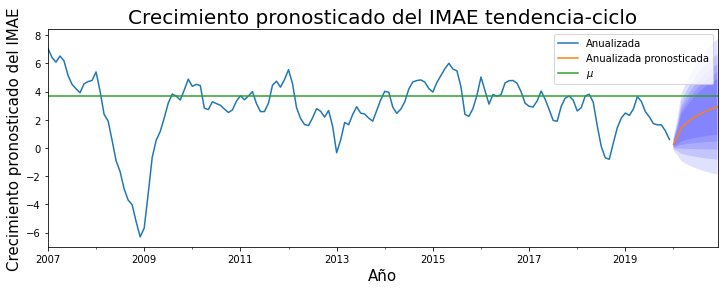

(e) (6 puntos ) Compare su pronóstico con los datos publicados por el BCCR para 2020. Calcule los
errores de pronóstico. Comente: ¿es este un buen modelo de pronóstico? Justifique su respuesta.

In [ ]:
figura1(fcast2.loc['2020-01':'2020-11'][['Anualizada pronosticada']], fecha.loc['2020-01':'2020-11']["Anualizada"], "Pronóstico de la tasa de crecimiento interanual del PIB", 'Tasa de crecimiento mensual anualizada del PIB de Costa Rica',"Pronóstico de la tasa de crecimiento para 2020 y la verdadera tasa de crecimiento mensual anualizada",'por ciento')   

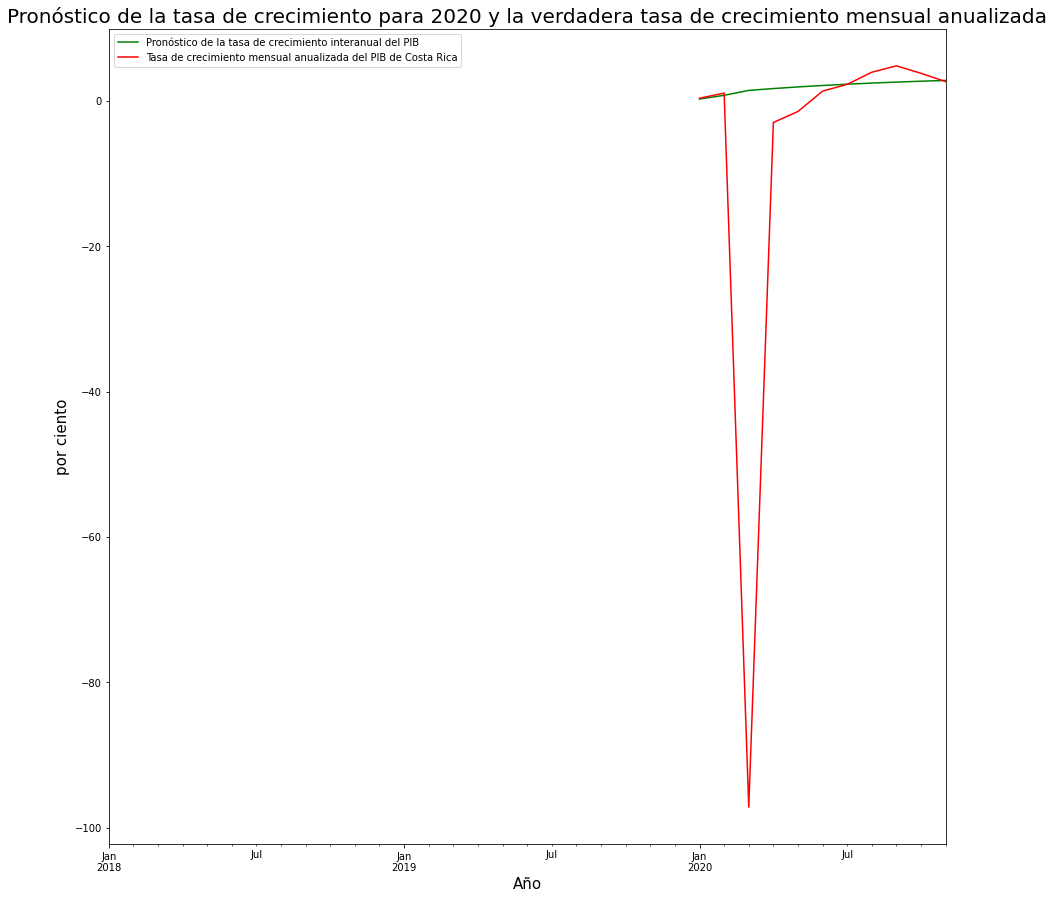

In [ ]:
#Errores del pronóstico
datos_pronosticados =fcast2.loc['2020-01':'2020-11'][['Anualizada pronosticada']]
datos_observados = fecha.loc['2020-01':'2020-11']["Anualizada"]
datos_pronosticados = pd.DataFrame(datos_pronosticados)
datos_observados = pd.DataFrame(datos_observados)
error =datos_observados["Anualizada"] - datos_pronosticados["Anualizada pronosticada"]
error.plot(kind='line',x='Fecha',y='Errores',color='red')
plt.title("Errores del pronóstico de la tasa de crecimiento del IMAE para el año 2020")
plt.show()

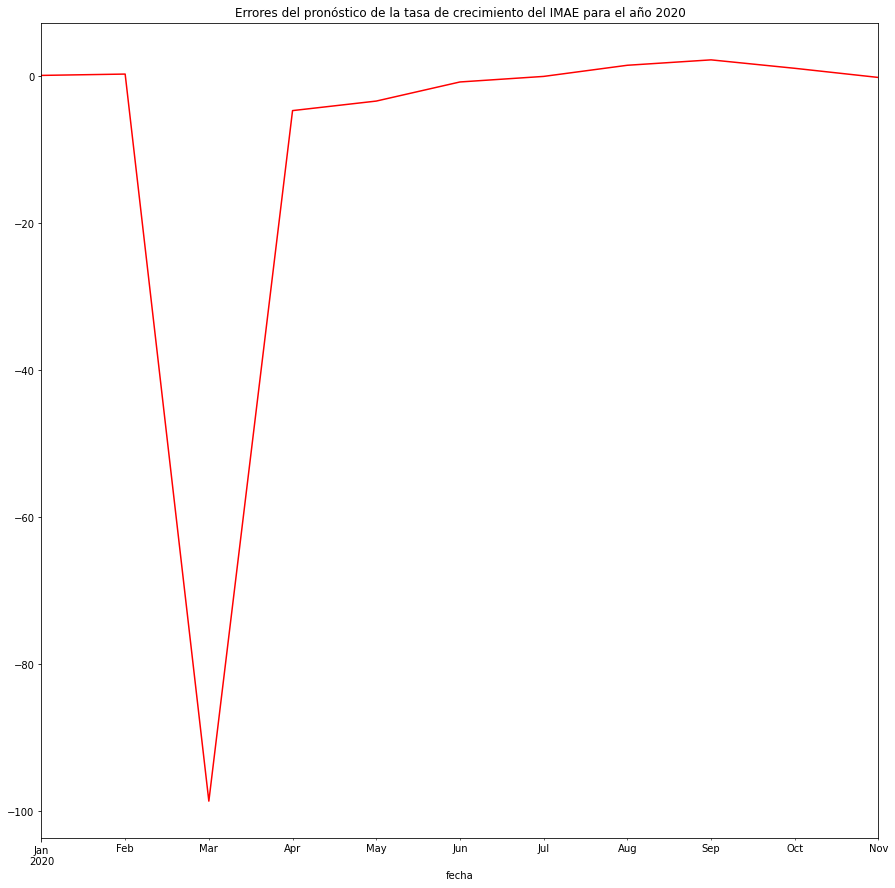

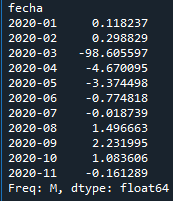

Este es estadísticamente un buen modelo de pronóstico, pues este procedimiento es aquel que minimiza el error cuadrático medio, por eso, lo definimos como el mejor pronóstico de este tipo. Claramente, no siempre va a pronosticar con exactitud, pero es el mejor. Otra característica de este pronóstico con el menor error cuadrático medio es la esperanza de todos los valores pronosticados condicional en los datos existentes.